### Постановка задачи
Всего 3 набора данных:<br>
(1) building_metadata - данные о зданиях, <br>
(2) energo_train - данные по энергопотреблению здания и <br>
(3) weather_train -данные о погоде<br>

* (1) содержит building_id, для которого есть данные (2)
* (1) содержит site_id, для которого есть данные (3)

Нужно объединить все наборы данных по building_id, site_id и timestamp
ETL = получение + очистка + совмещение данных

## Данные:
### Директория где находятся исходные данные 
/home/al/PycharmProjects/examples_problem_solving_kaggl/mashin_learning_and_kaggle/jupiter_bilder/source_data/<br>

### сами данные: 
train.csv - данные по энергопотреблению <br>

building_metadata.csv - данные по зданиям<br>

weather_train.csv - данные о погоде <br>


## Соревнование:
https://www.kaggle.com/c/ashrae-energy-prediction/

### Подключение библиотек

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import pickle
rcParams['figure.figsize'] = 16, 8

### Загрузка данных: здания
* primary_use - назначение
* square_feet - площадь, кв.футы
* year_built - год постройки
* floor_count - число этажей

In [2]:
# получение из сети
buildings = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/building_metadata.csv.gz")

In [3]:
with open('/home/al/Projects_My/examples_problem_solving_kaggl/DataSets/building_metadata.pickle', 'wb') as f_d:
    pickle.dump(buildings, f_d)

In [4]:
# загрузка с локального компьютера
with open('/home/al/Projects_My/examples_problem_solving_kaggl/DataSets/building_metadata.pickle', 'rb') as f_d:
    buildings = pickle.load(f_d)
print (buildings.head())

   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN


### Первичный анализ данных 
различные группировки 
1. Сколько зданий построено по годам
2. Сколько каких заданий по типу использования.
3. Как распределены здания предназнаенные для образования по площади. 

In [5]:
# Сколько зданий построено по годам
build_year = buildings.groupby(['year_built']).count()
print(build_year)

            site_id  building_id  primary_use  square_feet  floor_count
year_built                                                             
1900.0            5            5            5            5            2
1902.0            1            1            1            1            0
1903.0            3            3            3            3            1
1904.0            2            2            2            2            0
1905.0            1            1            1            1            1
...             ...          ...          ...          ...          ...
2013.0            9            9            9            9            1
2014.0           12           12           12           12            1
2015.0            3            3            3            3            1
2016.0            7            7            7            7            1
2017.0            1            1            1            1            0

[116 rows x 5 columns]


In [6]:
# максимальное количество зданий построенных за год
print(buildings.groupby('year_built')['year_built'].count().max())

55


In [7]:
# год в котором было построенно максимальное количество зданий
print(buildings.groupby('year_built')['year_built'].count().idxmax())

1976.0


<Axes: xlabel='year_built'>

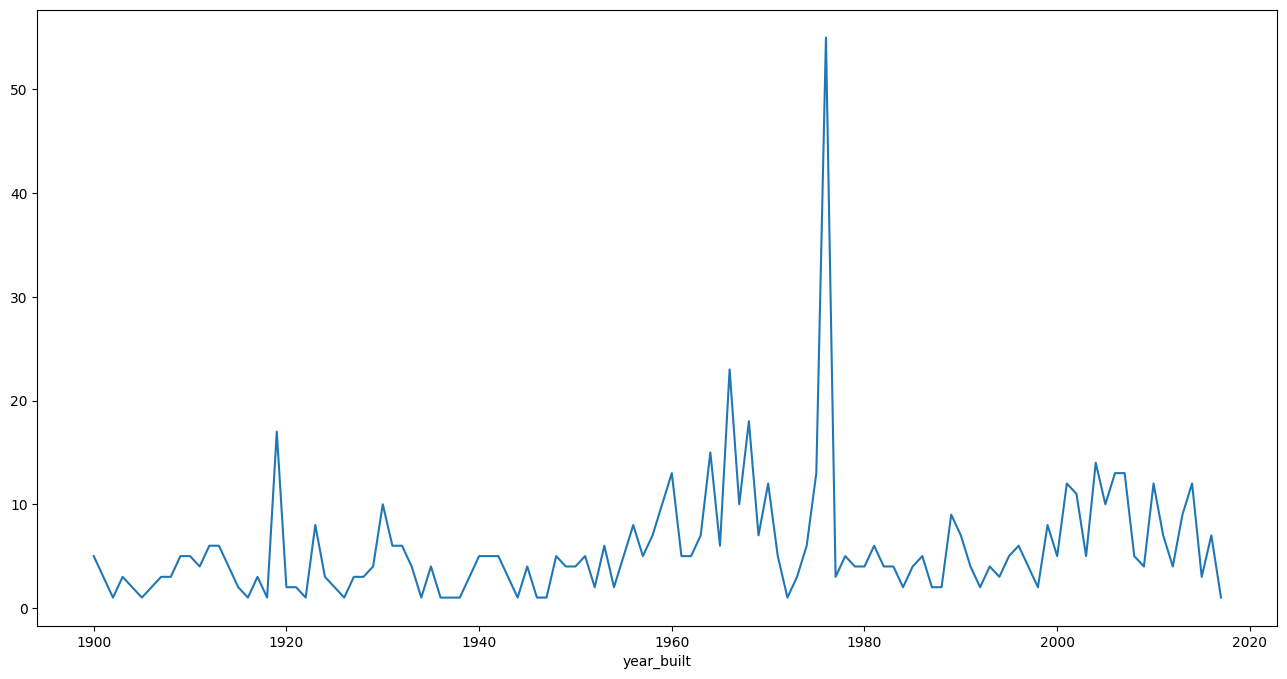

In [8]:
# построить график год - количество зданий
buildings.groupby('year_built')['year_built'].count().plot()

In [10]:
# Сколько зданий построенно по годам с разбивкой по первоначальному предназначению
build_year_user = buildings.loc[:,['year_built', 'primary_use']]
build_year_user.head()

,year_built,primary_use
0,2008.0,Education
1,2004.0,Education
2,1991.0,Education
3,2002.0,Education
4,1975.0,Education


In [11]:
primary_use = buildings['primary_use'].unique()
primary_use

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [16]:
educ = build_year_user[build_year_user['primary_use'] == 'Education']
educ.head()
ax = build_year_user.plot.bar(x = educ['year_built'], y =educ['primary_use'])

KeyError: "None of [Index([2008.0, 2004.0, 1991.0, 2002.0, 1975.0, 2000.0, 1989.0, 2003.0, 1968.0,\n       2000.0,\n       ...\n       1968.0, 1913.0, 1967.0, 1961.0, 1968.0, 1990.0, 1957.0, 1951.0, 1913.0,\n          nan],\n      dtype='float64', length=549)] are in the [columns]"

### Загрузка данных: погода
* air_temperature - температура воздуха, С
* dew_temperature - точка росы (влажность), С
* cloud_coverage - облачность, %
* precip_depth_1_hr - количество осадков, мм/час
* sea_level_pressure - давление, мбар
* wind_direction - направление ветра, градусы
* wind_speed - скорость ветра, м/с

In [4]:
# получение из сети
#weather = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/weather_train.csv.gz")

In [5]:
weather = pd.read_csv(full_path + "weather_train.csv")
print (weather.head())

   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00             25.0             6.0   
1        0  2016-01-01 01:00:00             24.4             NaN   
2        0  2016-01-01 02:00:00             22.8             2.0   
3        0  2016-01-01 03:00:00             21.1             2.0   
4        0  2016-01-01 04:00:00             20.0             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN              1019.7             0.0   
1             21.1               -1.0              1020.2            70.0   
2             21.1                0.0              1020.2             0.0   
3             20.6                0.0              1020.1             0.0   
4             20.0               -1.0              1020.0           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3         0.0  
4         2.6  


In [6]:
# получение из сети
#energy_0 = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz")

### Загрузка данных: потребление энергии здания
* meter_reading - значение показателя (TOE, эквивалент тонн нефти)

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            1      0  2016-01-01 00:00:00            0.0
2            2      0  2016-01-01 00:00:00            0.0
3            3      0  2016-01-01 00:00:00            0.0
4            4      0  2016-01-01 00:00:00            0.0


/home/al/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


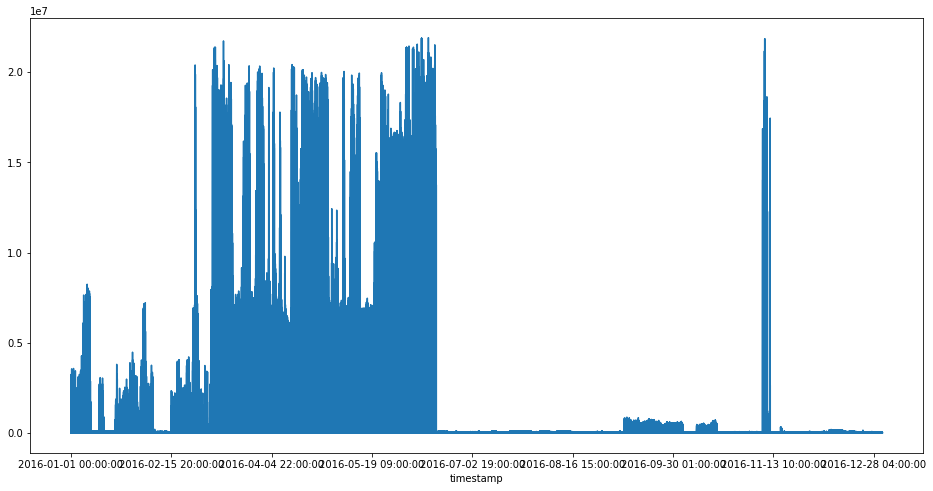

In [7]:
energy_0 = pd.read_csv(full_path + "train.csv")
print (energy_0.head())
energy_0.set_index("timestamp")["meter_reading"].plot()
plt.show()

### Объединение потребления энергии и информацию о здании
Проводим объединение по building_id

In [8]:
energy_0 = pd.merge(left=energy_0, right=buildings, how="left",
                   left_on="building_id", right_on="building_id")
print (energy_0.head())

   building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            1      0  2016-01-01 00:00:00            0.0        0   
2            2      0  2016-01-01 00:00:00            0.0        0   
3            3      0  2016-01-01 00:00:00            0.0        0   
4            4      0  2016-01-01 00:00:00            0.0        0   

  primary_use  square_feet  year_built  floor_count  
0   Education         7432      2008.0          NaN  
1   Education         2720      2004.0          NaN  
2   Education         5376      1991.0          NaN  
3   Education        23685      2002.0          NaN  
4   Education       116607      1975.0          NaN  


### Объединение потребления энергии и погоды
Выставим индексы для объединения - timestamp, site_id

In [9]:
energy_0.set_index(["timestamp", "site_id"], inplace=True)
weather.set_index(["timestamp", "site_id"], inplace=True)

Проведем объединение и сбросим индексы

In [10]:
energy_0 = pd.merge(left=energy_0, right=weather, how="left",
                   left_index=True, right_index=True)
energy_0.reset_index(inplace=True)
print (energy_0.head())

             timestamp  site_id  building_id  meter  meter_reading  \
0  2016-01-01 00:00:00        0            0      0            0.0   
1  2016-01-01 00:00:00        0            1      0            0.0   
2  2016-01-01 00:00:00        0            2      0            0.0   
3  2016-01-01 00:00:00        0            3      0            0.0   
4  2016-01-01 00:00:00        0            4      0            0.0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   
1   Education         2720      2004.0          NaN             25.0   
2   Education         5376      1991.0          NaN             25.0   
3   Education        23685      2002.0          NaN             25.0   
4   Education       116607      1975.0          NaN             25.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                NaN              10

### Нахождение пропущенных данных
Посчитаем количество пропусков данных по столбцам

In [11]:
for column in energy_0.columns:
    energy_nulls = energy_0[column].isnull().sum()
    if energy_nulls > 0:
        print (column + ": " + str(energy_nulls))
print (energy_0[energy_0["precip_depth_1_hr"].isnull()])

year_built: 12127645
floor_count: 16709167
air_temperature: 96658
cloud_coverage: 8825365
dew_temperature: 100140
precip_depth_1_hr: 3749023
sea_level_pressure: 1231669
wind_direction: 1449048
wind_speed: 143676
                    timestamp  site_id  building_id  meter  meter_reading  \
0         2016-01-01 00:00:00        0            0      0          0.000   
1         2016-01-01 00:00:00        0            1      0          0.000   
2         2016-01-01 00:00:00        0            2      0          0.000   
3         2016-01-01 00:00:00        0            3      0          0.000   
4         2016-01-01 00:00:00        0            4      0          0.000   
...                       ...      ...          ...    ...            ...   
20215251  2016-12-31 23:00:00       12         1064      0        153.847   
20215252  2016-12-31 23:00:00       12         1065      0          5.215   
20215253  2016-12-31 23:00:00       12         1066      0         25.890   
20215254  2016-12-

### Заполнение пропущенных данных
* air_temperature: NaN -> 0
* cloud_coverage: NaN -> 0
* dew_temperature: NaN -> 0
* precip_depth_1_hr: NaN -> 0, -1 -> 0
* sea_level_pressure: NaN -> среднее
* wind_direction: NaN -> среднее (роза ветров)

In [12]:
energy_0["air_temperature"].fillna(0, inplace=True)
energy_0["cloud_coverage"].fillna(0, inplace=True)
energy_0["dew_temperature"].fillna(0, inplace=True)
energy_0["precip_depth_1_hr"] = energy_0["precip_depth_1_hr"].apply(lambda x:x if x>0 else 0)
energy_0_sea_level_pressure_mean = energy_0["sea_level_pressure"].mean()
energy_0["sea_level_pressure"] = energy_0["sea_level_pressure"].apply(lambda x:energy_0_sea_level_pressure_mean if x!=x else x)
energy_0_wind_direction_mean = energy_0["wind_direction"].mean()
energy_0["wind_direction"] = energy_0["wind_direction"].apply(lambda x:energy_0_wind_direction_mean if x!=x else x)
energy_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamp           object 
 1   site_id             int64  
 2   building_id         int64  
 3   meter               int64  
 4   meter_reading       float64
 5   primary_use         object 
 6   square_feet         int64  
 7   year_built          float64
 8   floor_count         float64
 9   air_temperature     float64
 10  cloud_coverage      float64
 11  dew_temperature     float64
 12  precip_depth_1_hr   float64
 13  sea_level_pressure  float64
 14  wind_direction      float64
 15  wind_speed          float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.4+ GB


In [13]:
energy_0.to_csv('energy_o_full_data.csv', sep='^',index=False)